## Practice 1. K-means clustering

붓꽃의 꽃받침 길이와 너비, 꽃잎의 길이와 너비, 그리고 종을 담은 데이터 셋이 있습니다. 종을 모른다고 가정하고 K-means clustering을 이용해서 군집을 지어보세요. elbow method를 이용해서 최적의 클러스터 개수를 찾아보세요. K-means clustering으로 묶은 군집이 실제 종과 얼마나 일치하는 지를 비교해보세요

In [1]:
import pandas as pd

df = pd.read_csv("./data/iris.csv")

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import font_manager, rc
font_path = r"C:\WINDOWS\FONTS\MALGUN.TTF" #폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [4]:
import numpy as np

## **EDA**

In [5]:
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [6]:
columns_list = df.columns.tolist()

In [7]:
for column in columns_list:
    print(f"{column}의 기초 통계량")
    print(df[column].describe())
    print("")

Id의 기초 통계량
count    150.000000
mean      75.500000
std       43.445368
min        1.000000
25%       38.250000
50%       75.500000
75%      112.750000
max      150.000000
Name: Id, dtype: float64

SepalLengthCm의 기초 통계량
count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

SepalWidthCm의 기초 통계량
count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

PetalLengthCm의 기초 통계량
count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64

PetalWidthCm의 기초 통계량
count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%    

### 시각화

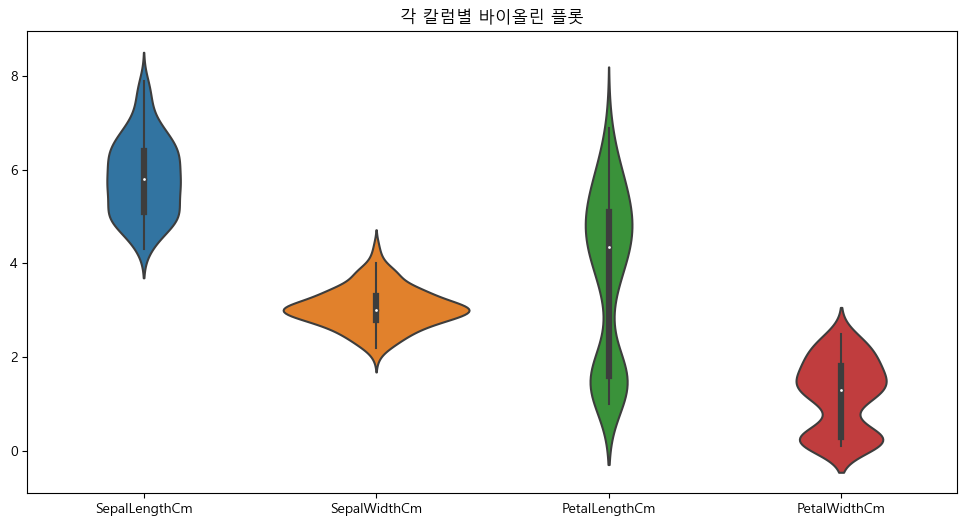

In [8]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']])
plt.title("각 칼럼별 바이올린 플롯")
plt.show()

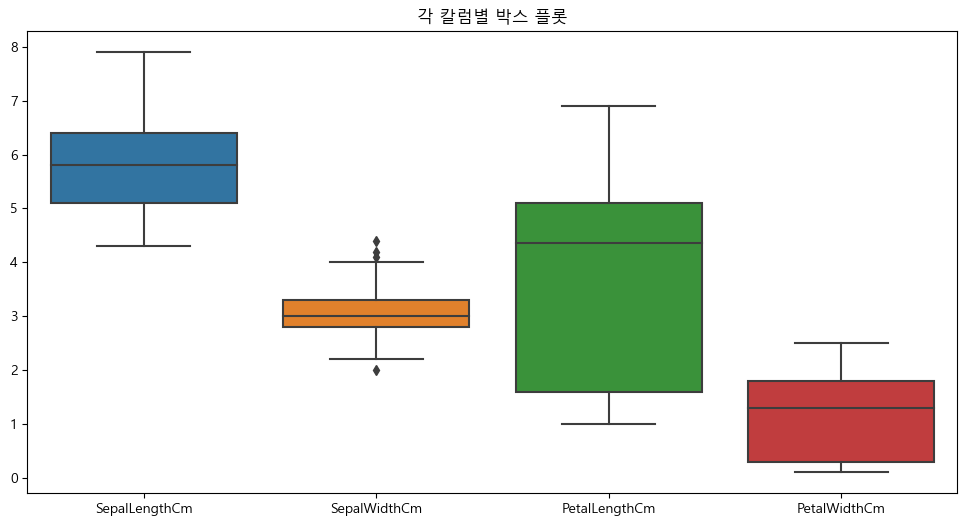

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']])
plt.title("각 칼럼별 박스 플롯")
plt.show()

## **Clustering**

### Step 1) 클러스터링 개수 정하기

In [10]:
from sklearn.cluster import KMeans

def train_model(num_cluster, data):
    model = KMeans(
        n_init=10,
        n_clusters=num_cluster,
        random_state=1234
    )
    model.fit(data)
    return model

In [11]:
def elbow_method(data):
    inertia_list = []
    for i in range(2, 11):
        model = train_model(num_cluster=i, data=data)
        inertia_list.append(model.inertia_)
    return inertia_list

In [12]:
def plot_inertia(inertia_list, columns):
    plt.plot(range(2,11),inertia_list, marker='o', label="inertia")
    plt.title(f"{'-'.join(columns)} K Means Inertia")
    plt.xlabel("num cluster")
    plt.ylabel("inertia")
    plt.legend()

In [13]:
cur_df = df[["PetalLengthCm", "PetalWidthCm"]]
data = cur_df.values
columns = cur_df.columns
inertia_list = elbow_method(data)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [14]:
inertia_list

[86.40394533571005,
 31.387758974358974,
 19.499400899685114,
 13.933308757908756,
 11.041545110250372,
 9.329296073517126,
 7.631802244955955,
 6.572886291486291,
 5.8382925407925415]

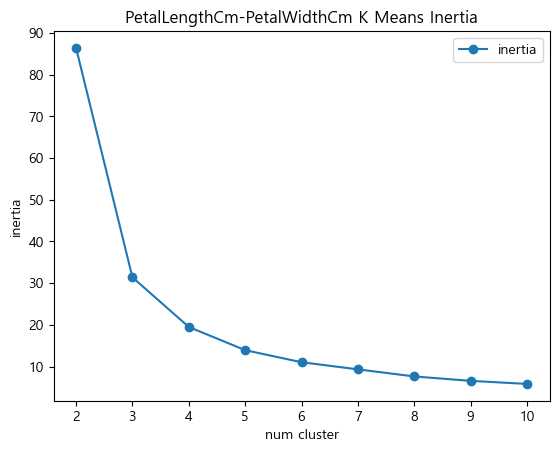

In [15]:
plot_inertia(inertia_list, columns)

### Step 2) 모델 학습

In [16]:
def inference(model, data):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
    return xx, yy, Z

In [17]:
def plot_kmeans_cluster(xx, yy, Z, model, data, columns):
    labels = model.labels_
    centroids = model.cluster_centers_
    plt.figure(1 , figsize = (10, 5))
    plt.clf()
    Z = Z.reshape(xx.shape)
    plt.imshow(
        Z, 
        interpolation='nearest', 
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Pastel2, 
        aspect = 'auto', 
        origin='lower'
    )
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=10)
    plt.scatter(centroids[: , 0], centroids[: , 1],  s=300, c='red', alpha = 0.5)
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])

In [18]:
cur_df.head()

PetalLengthCm  PetalWidthCm
0            1.4           0.2
1            1.4           0.2
2            1.3           0.2
3            1.5           0.2
4            1.4           0.2

In [19]:
K = 5
model = train_model(num_cluster=K, data = cur_df.values)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'K-Means Clustering (K=5)')

C:\ProgramData\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


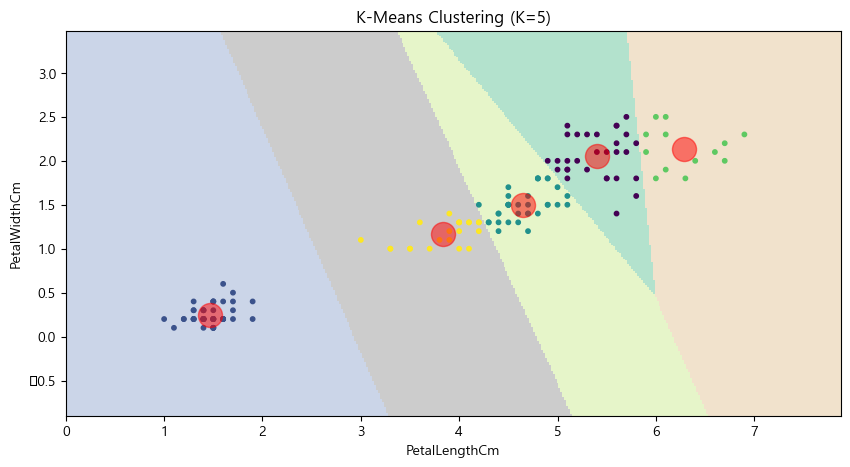

In [20]:
xx, yy, Z = inference(model, data)
plot_kmeans_cluster(xx, yy, Z, model, data, columns)
plt.title(f"K-Means Clustering (K={K})")

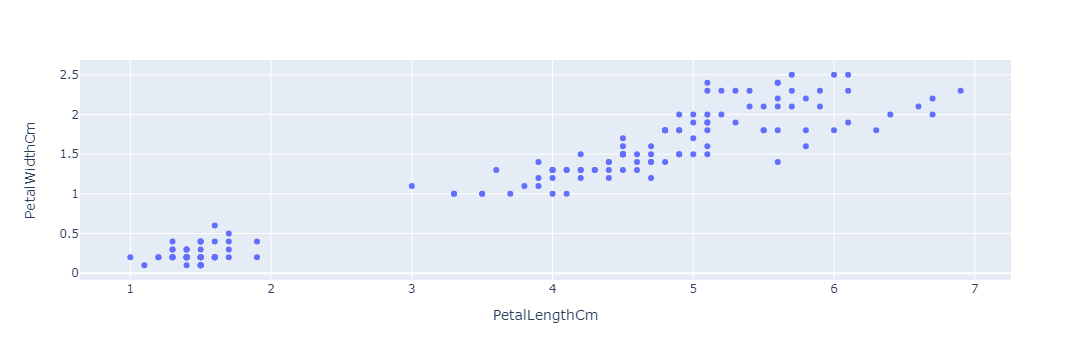

In [21]:
import plotly.express as px

fig = px.scatter(cur_df, x="PetalLengthCm", y="PetalWidthCm")
fig.show()

In [22]:
df[(df["PetalWidthCm"] < 0.6) & (df["PetalLengthCm"] <= 1.9)][["PetalWidthCm", "PetalLengthCm"]].describe()

PetalWidthCm  PetalLengthCm
count     49.000000      49.000000
mean       0.236735       1.461224
std        0.095074       0.174184
min        0.100000       1.000000
25%        0.200000       1.400000
50%        0.200000       1.500000
75%        0.300000       1.500000
max        0.500000       1.900000

In [23]:
df[df["PetalWidthCm"].between(1.0,1.4) & df["PetalLengthCm"].between(2.0,4.2)][["PetalWidthCm", "PetalLengthCm"]].describe()

PetalWidthCm  PetalLengthCm
count     22.000000      22.000000
mean       1.168182       3.831818
std        0.139340       0.332933
min        1.000000       3.000000
25%        1.000000       3.625000
50%        1.200000       3.950000
75%        1.300000       4.075000
max        1.400000       4.200000

In [24]:
df[df["PetalWidthCm"].between(1.2,1.8) & df["PetalLengthCm"].between(4.2,5.1)][["PetalWidthCm", "PetalLengthCm"]].describe()

PetalWidthCm  PetalLengthCm
count     39.000000      39.000000
mean       1.489744       4.625641
std        0.181796       0.265288
min        1.200000       4.200000
25%        1.350000       4.450000
50%        1.500000       4.600000
75%        1.600000       4.800000
max        1.800000       5.100000

In [25]:
df[df["PetalWidthCm"].between(1.4,2.5) & df["PetalLengthCm"].between(4.9,5.8)][["PetalWidthCm", "PetalLengthCm"]].describe()

PetalWidthCm  PetalLengthCm
count     38.000000      38.000000
mean       1.960526       5.307895
std        0.300036       0.303477
min        1.400000       4.900000
25%        1.800000       5.100000
50%        1.950000       5.250000
75%        2.200000       5.600000
max        2.500000       5.800000

In [27]:
for i in range(len(df)):
    if (df.iloc[i]["PetalWidthCm"] <= 0.6) and (df.iloc[i]["PetalLengthCm"] <= 1.9):
        df.loc[i, "group"] = "A"
    elif (1.0 <= df.iloc[i]["PetalWidthCm"] <= 1.4) and (2.0 <= df.iloc[i]["PetalLengthCm"] <= 4.2):
        df.loc[i, "group"] = "B"
    elif (1.2 <= df.iloc[i]["PetalWidthCm"] <= 1.8) and (4.2 <= df.iloc[i]["PetalLengthCm"] <= 5.1):
        df.loc[i, "group"] = "C"
    elif (1.4 <= df.iloc[i]["PetalWidthCm"] <= 2.5) and (4.9 <= df.iloc[i]["PetalLengthCm"] <= 5.8):
        df.loc[i, "group"] = "D"
    else:
        df.loc[i, "group"] = "E"

In [28]:
df["group"].describe()

count     150
unique      5
top         A
freq       50
Name: group, dtype: object

In [29]:
df["group"].unique()

array(['A', 'C', 'B', 'E', 'D'], dtype=object)

In [30]:
group_list = ['A', 'B', 'C', 'D', 'E']

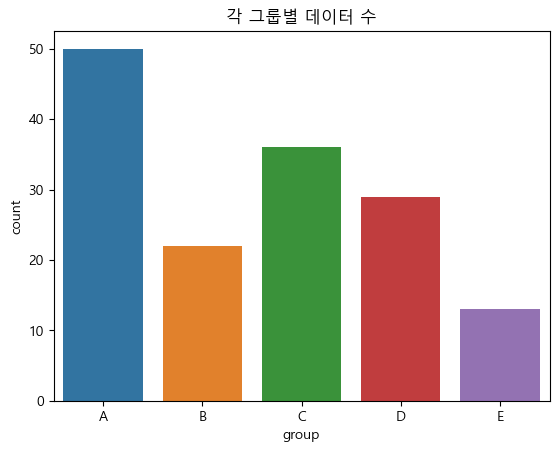

In [31]:
sns.countplot(x='group', data=df, order=group_list)
plt.title("각 그룹별 데이터 수")
plt.show()

### Step 3) 군집 개수 수정 및 2차 시각화

In [32]:
K = 4
model = train_model(num_cluster=K, data = cur_df.values)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0.5, 1.0, 'K-Means Clustering (K=4)')

C:\ProgramData\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



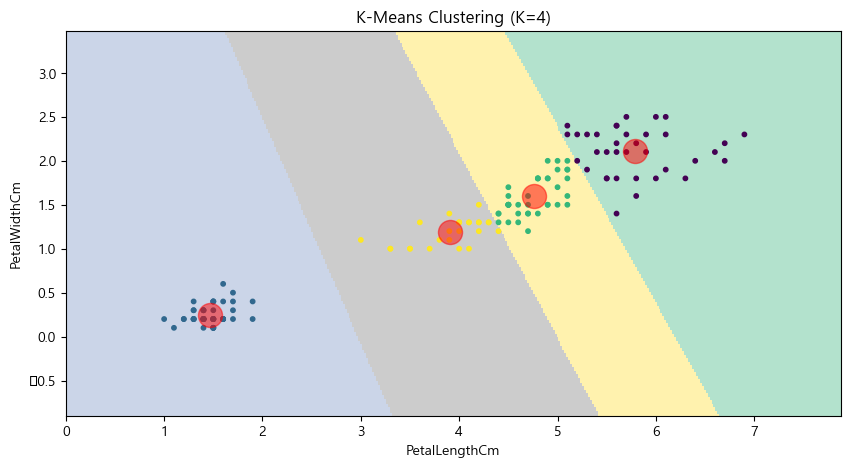

In [33]:
xx, yy, Z = inference(model, data)
plot_kmeans_cluster(xx, yy, Z, model, data, columns)
plt.title(f"K-Means Clustering (K={K})")

In [34]:
df["Group_2"] = ""

In [35]:
for i in range(len(df)):
    if (df.iloc[i]["PetalWidthCm"] <= 0.6) and (df.iloc[i]["PetalLengthCm"] <= 1.9):
        df.loc[i, "Group_2"] = "A"
    elif (1.0 <= df.iloc[i]["PetalWidthCm"] <= 1.5) and (2.0 <= df.iloc[i]["PetalLengthCm"] <= 4.4):
        df.loc[i, "Group_2"] = "B"
    elif (1.2 <= df.iloc[i]["PetalWidthCm"] <= 2.0) and (4.4 <= df.iloc[i]["PetalLengthCm"] <= 5.1):
        df.loc[i, "Group_2"] = "C"
    else:
        df.loc[i, "Group_2"] = "D"

In [36]:
df[df["Group_2"] == "C"].describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   35.000000      35.000000     35.000000      35.000000     35.000000
mean    92.485714       6.134286      2.862857       4.788571      1.617143
std     31.136674       0.439212      0.282932       0.219319      0.217588
min     51.000000       4.900000      2.200000       4.500000      1.200000
25%     68.000000       5.900000      2.700000       4.600000      1.500000
50%     85.000000       6.100000      2.900000       4.800000      1.500000
75%    121.000000       6.350000      3.000000       5.000000      1.800000
max    150.000000       7.000000      3.400000       5.100000      2.000000

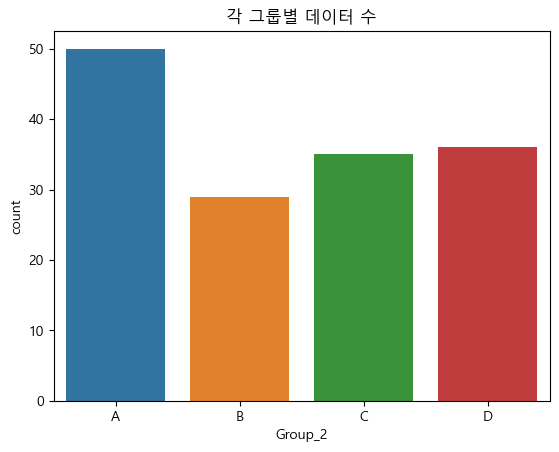

In [37]:
sns.countplot(x='Group_2', data=df, order=["A","B","C","D"])
plt.title("각 그룹별 데이터 수")
plt.show()

### Step 4) 특성 변수 변경

In [38]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'group', 'Group_2'],
      dtype='object')

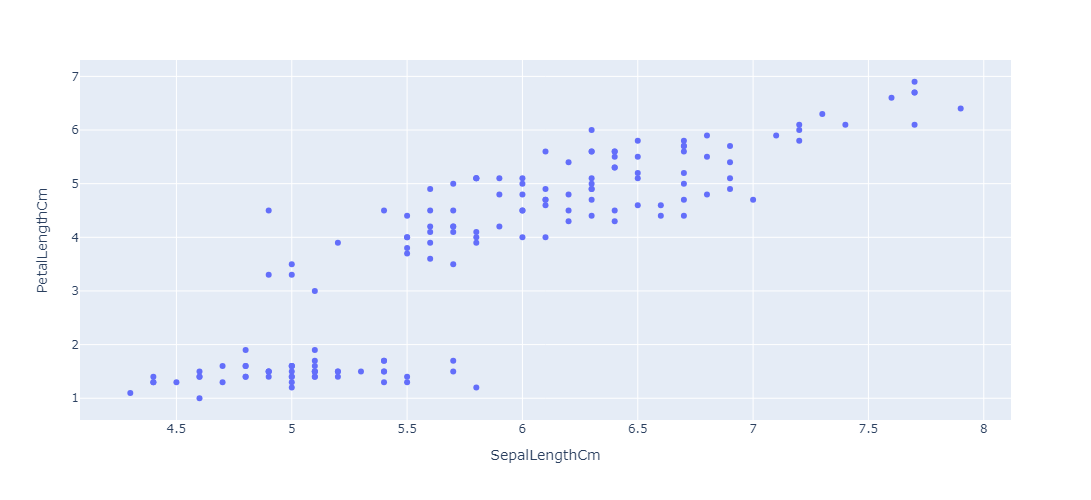

In [39]:
import plotly.express as px

fig = px.scatter(df[['SepalLengthCm', 'PetalLengthCm']], x="SepalLengthCm", y="PetalLengthCm")
fig.update_layout(width=1200, height=500)
fig.show()

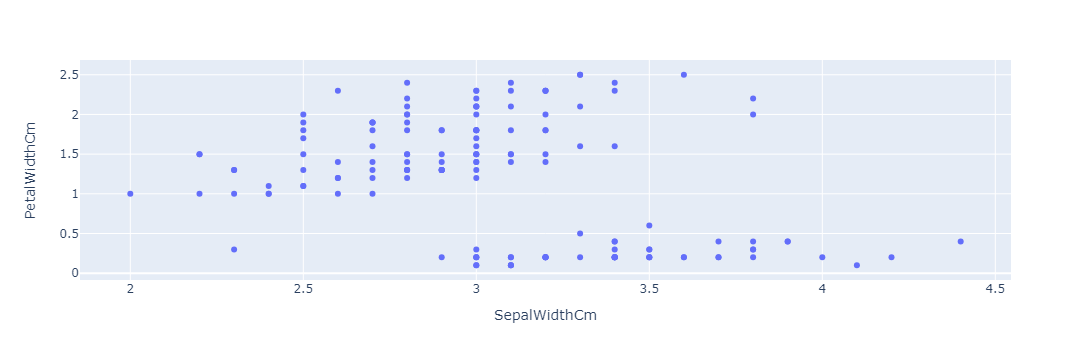

In [40]:
import plotly.express as px

fig = px.scatter(df[['SepalWidthCm', 'PetalWidthCm']], x="SepalWidthCm", y="PetalWidthCm")
fig.show()

### Step 5) 군집 개수 지정

In [41]:
cur_df = df[['SepalLengthCm', 'PetalLengthCm']]
data = cur_df.values
columns = cur_df.columns
inertia_list = elbow_method(data)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

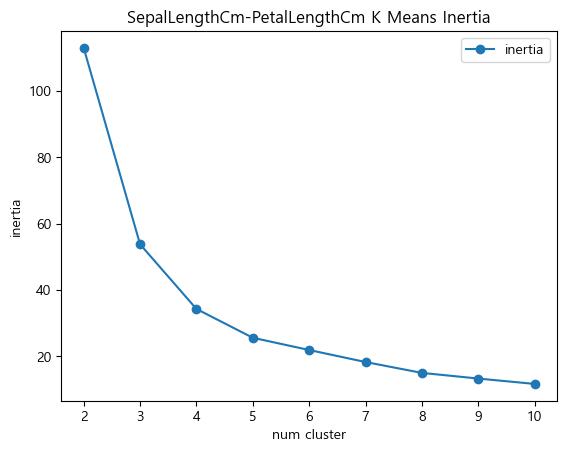

In [42]:
plot_inertia(inertia_list, columns)

In [43]:
K = 5
model = train_model(num_cluster=K, data = cur_df.values)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0.5, 1.0, 'K-Means Clustering (K=5)')

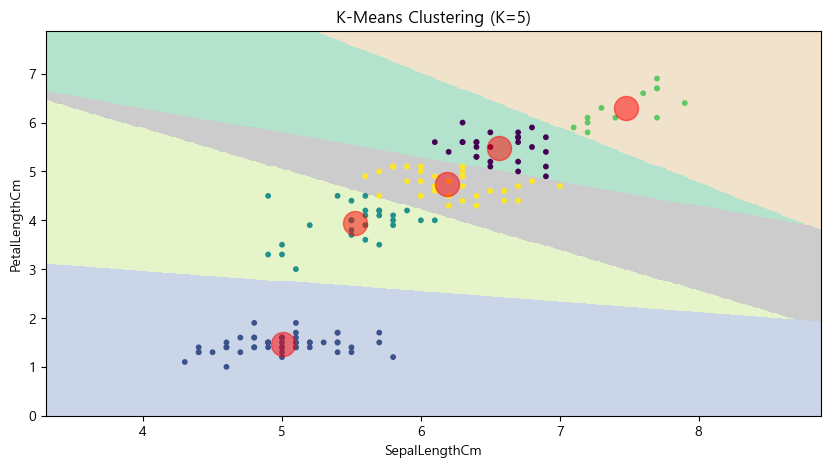

In [44]:
xx, yy, Z = inference(model, data)
plot_kmeans_cluster(xx, yy, Z, model, data, columns)
plt.title(f"K-Means Clustering (K={K})")

In [45]:
df["Group_3"] = ""

In [46]:
for i in range(len(df)):
    if (df.iloc[i]["SepalLengthCm"] <= 5.8) and (df.iloc[i]["PetalLengthCm"] <= 2):
        df.loc[i, "Group_3"] = "A"
    elif (4.9 <= df.iloc[i]["SepalLengthCm"] <= 6.1) and (3 <= df.iloc[i]["PetalLengthCm"] <= 4.5):
        df.loc[i, "Group_3"] = "B"
    elif (5.6 <= df.iloc[i]["SepalLengthCm"] <= 7) and (4.3 <= df.iloc[i]["PetalLengthCm"] <= 5.1):
        df.loc[i, "Group_3"] = "C"
    elif (6.1 <= df.iloc[i]["SepalLengthCm"] <= 6.9) and (4.9 <= df.iloc[i]["PetalLengthCm"] <= 6):
        df.loc[i, "Group_3"] = "D"
    else:
        df.loc[i, "Group_3"] = "E"

In [47]:
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species group Group_2 Group_3  
0       Iris-setosa     A       A       A  
1       Iris-setosa     A       A       A  
2       Iris-setosa     A       A       A  
3       Iris-setosa     A       A       A  
4       Iris-setosa     A       A       A  
..              ...   ...     ...     ...  
145  Iris-virginica     D       D       D  
146  Iris-virginica     D       C       C  
147  Iris-virginica     D       D       D  
148  Iris-virginica     D       D       D  
149  Iris-virginica     C       C       C  

[150 rows x 9 columns]

### Appendix

In [48]:
K = 4
model = train_model(num_cluster=K, data = cur_df.values)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0.5, 1.0, 'K-Means Clustering (K=4)')

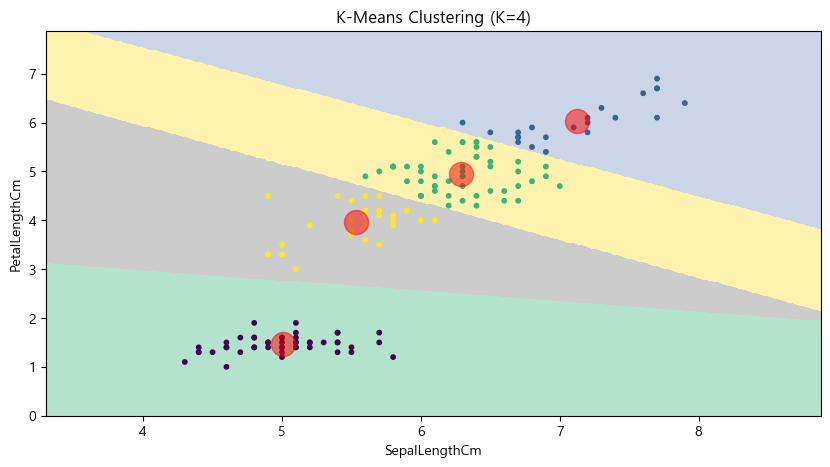

In [49]:
xx, yy, Z = inference(model, data)
plot_kmeans_cluster(xx, yy, Z, model, data, columns)
plt.title(f"K-Means Clustering (K={K})")

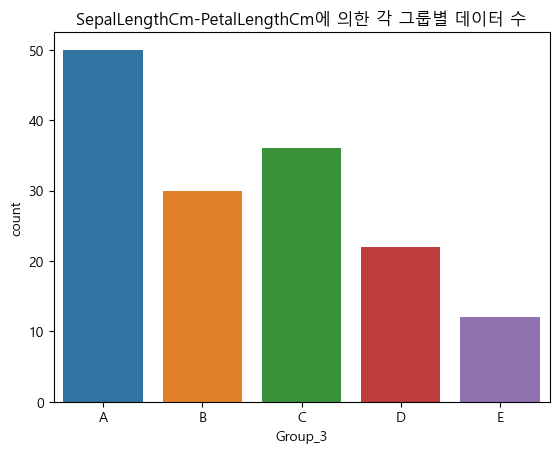

In [50]:
sns.countplot(x='Group_3', data=df, order=["A","B","C","D","E"])
plt.title(f"{'-'.join(columns)}에 의한 각 그룹별 데이터 수")
plt.show()

In [51]:
df["Species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [52]:
species_list = df["Species"].unique().tolist()

In [53]:
species_list

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

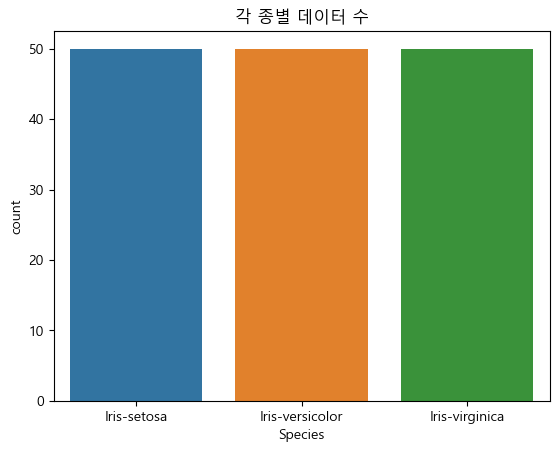

In [54]:
sns.countplot(x='Species', data=df)
plt.title("각 종별 데이터 수")
plt.show()

In [55]:
for i in range(len(species_list)):
    print(f"{species_list[i]}의 통계량")
    print(df[df["Species"] == species_list[i]].describe())

Iris-setosa의 통계량
             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000
Iris-versicolor의 통계량
              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197

In [56]:
print(columns_list)

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


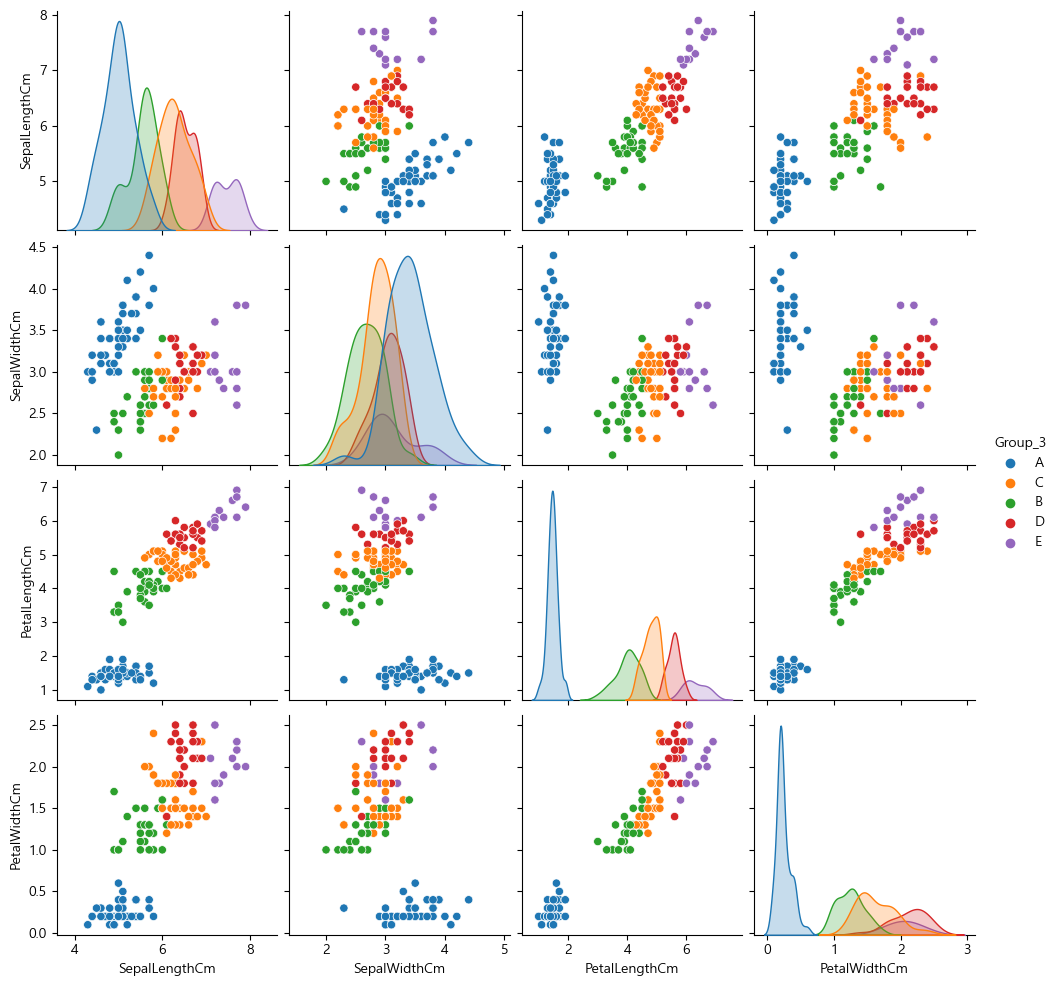

In [57]:
#주요 칼럼 군집 시각화
sns.pairplot(
    data=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Group_3']],
    hue="Group_3",
)

plt.savefig('./data/pairplot.png')

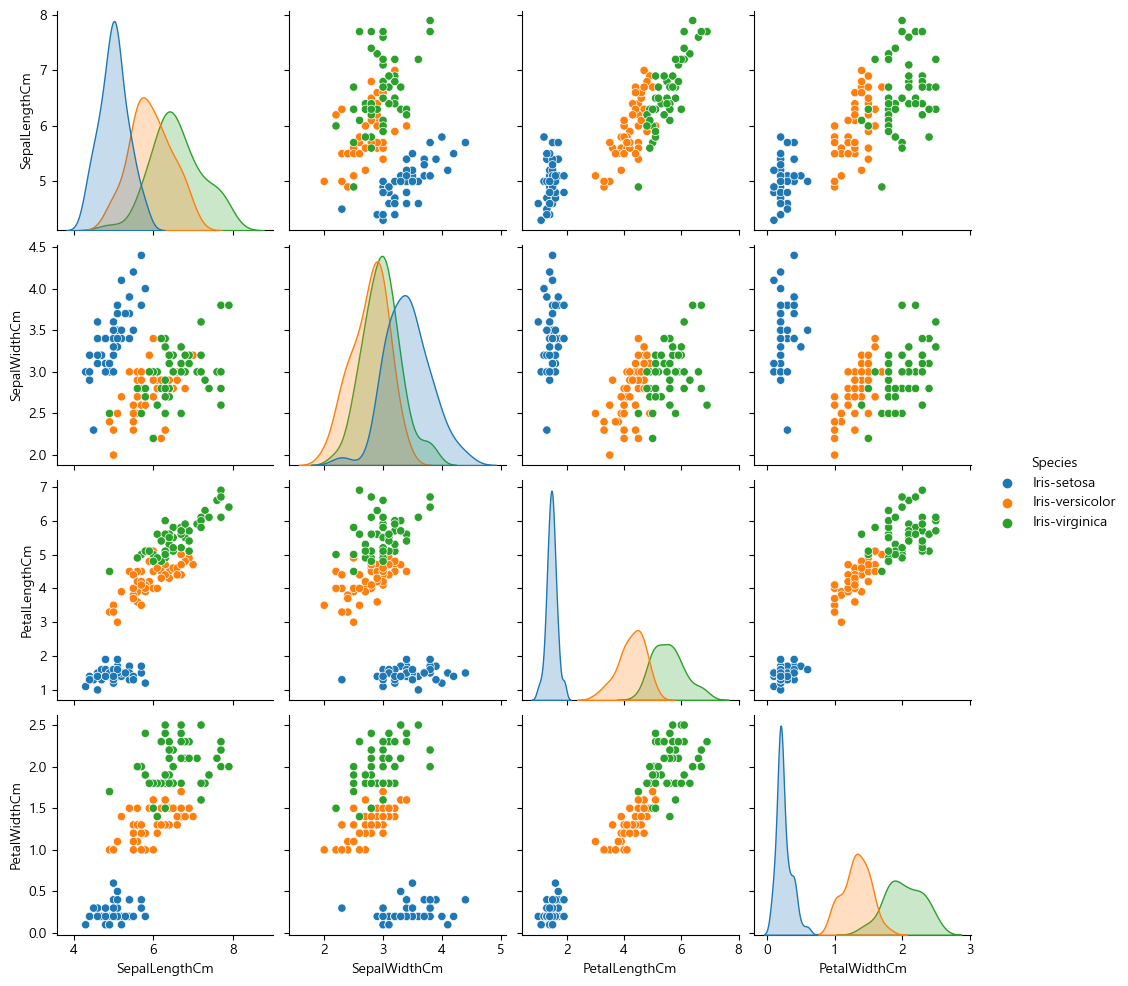

In [58]:
#주요 칼럼 군집 시각화
sns.pairplot(
    data=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],
    hue='Species',
)

### 3차원 그리기

In [60]:
model

KMeans(n_clusters=4, n_init=10, random_state=1234)

In [61]:
data=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Group_3']]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [63]:
import plotly.graph_objects as go
import plotly

labels = model.labels_
centroids = model.cluster_centers_

trace = go.Scatter3d(
    x= df['SepalLengthCm'],
    y= df['PetalLengthCm'],
    z= df['PetalWidthCm'],
    mode='markers',
    marker={
        "color": labels,
        "size": 2,
        "opacity": 0.8
    }
)


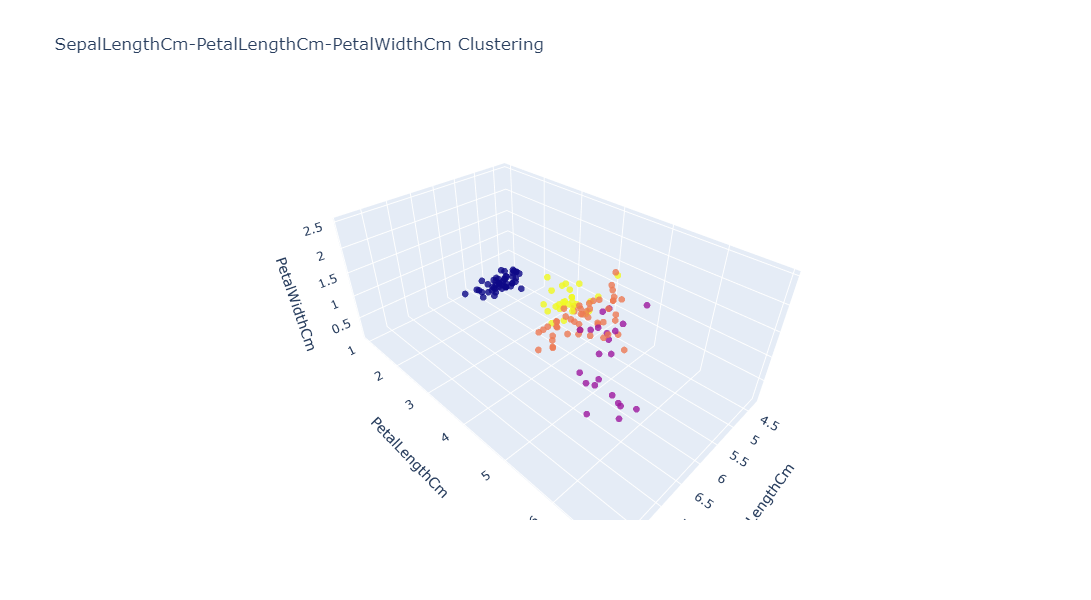

In [64]:
layout = go.Layout(
    title= 'SepalLengthCm-PetalLengthCm-PetalWidthCm Clustering',
    scene={
        "xaxis": {"title": "SepalLengthCm"},
        "yaxis": {"title": "PetalLengthCm"},
        "zaxis": {"title": "PetalWidthCm"},
    },
    width=1000,
    height=600
)
fig = go.Figure(data=[trace], layout=layout)
plotly.offline.iplot(fig)